In [1]:
import sys
import os
import shutil
import re
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.utils.data import random_split
from torch.utils.data import DataLoader
from torchvision import transforms as T

from data_manager import rgbd_gradients_dataset, rgbd_gradients_dataloader
from functions import torch2np_u8
import plot
import gardients_to_navigation
from lines_utils import get_line

np.set_printoptions(threshold=sys.maxsize)
%matplotlib notebook

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cuda


In [3]:
CWD             = os.getcwd()
DATASET_DIR     = os.path.join(CWD,'data/nyuv2')
print(DATASET_DIR)

C:\Users\tomav\Documents\GitHub\cs236781-project\data/nyuv2


In [4]:
IMAGE_SIZE = (64,64)
TRAIN_TEST_RATIO = 0.9
BATCH_SIZE=4
NUM_WORKERS=4

In [5]:
tf_rgb = T.Compose([
    # Resize to constant spatial dimensions
    T.Resize(IMAGE_SIZE),
    # PIL.Image -> torch.Tensor
    T.ToTensor(),
    # Dynamic range [0,1] -> [-1, 1]
    T.Normalize(mean=(.5,.5,.5), std=(.5,.5,.5)),
])
tf_depth = T.Compose([
    # Resize to constant spatial dimensions
    T.Resize(IMAGE_SIZE),
    # PIL.Image -> torch.Tensor
    T.ToTensor(),
    # Dynamic range [0,1] -> [-1, 1]
    T.Normalize(mean=(.5,), std=(.5,)),
])

In [6]:
rgbd_grads_ds = rgbd_gradients_dataset(root=DATASET_DIR, transforms_rgb=tf_rgb, transforms_depth=tf_depth)

In [7]:
# _ = plot.rgbd_gradients_dataset_first_n(dataset=rgbd_grads_ds,n=2)
# print(f'Found {len(rgbd_grads_ds)} images in dataset folder.')

<IPython.core.display.Javascript object>


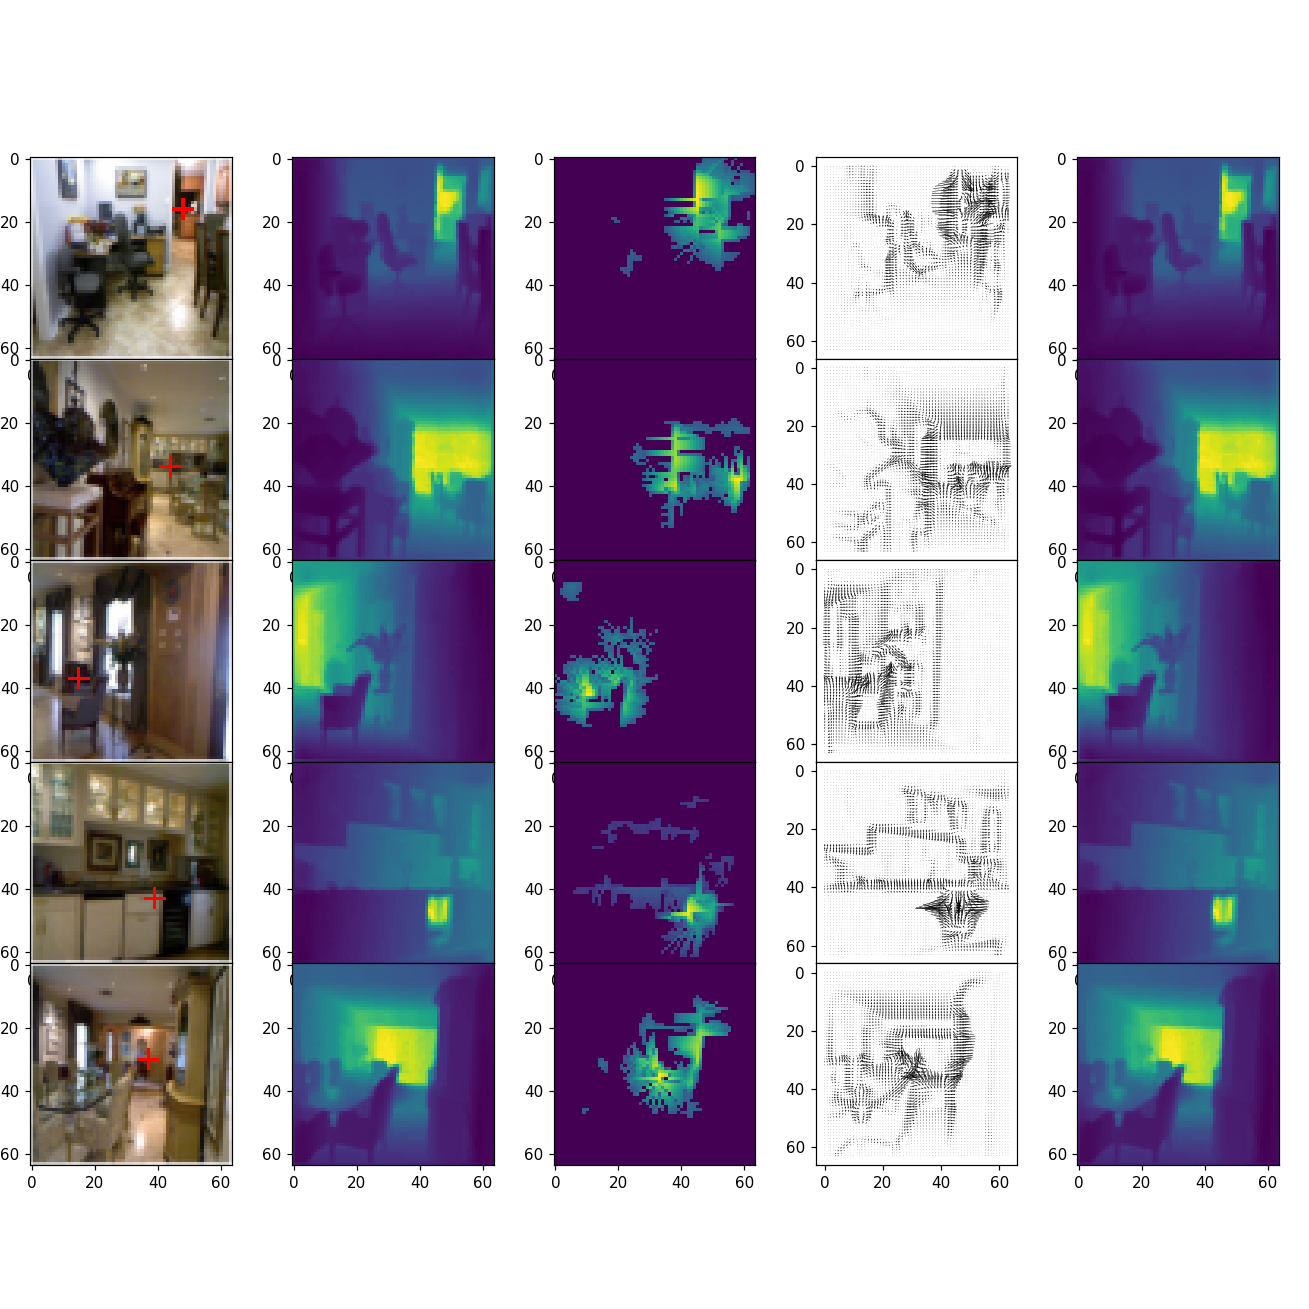

x_gardient y_gardient
tensor(0.7827) tensor(0.)
gardient_line
([9, 4], [9.0, 4.782745063304901])
WARNING, a line didn't find an intersection line with the image's frame.
x_gardient y_gardient
tensor(0.9506) tensor(0.)
gardient_line
([9, 5], [9.0, 5.950588166713715])
WARNING, a line didn't find an intersection line with the image's frame.
x_gardient y_gardient
tensor(2.1475) tensor(0.)
gardient_line
([11, 17], [11.0, 19.147451877593994])
WARNING, a line didn't find an intersection line with the image's frame.
x_gardient y_gardient
tensor(0.9976) tensor(0.)
gardient_line
([15, 7], [15.0, 7.997646987438202])
WARNING, a line didn't find an intersection line with the image's frame.
x_gardient y_gardient
tensor(1.0353) tensor(0.)
gardient_line
([15, 8], [15.0, 9.03529405593872])
WARNING, a line didn't find an intersection line with the image's frame.
x_gardient y_gardient
tensor(1.0729) tensor(0.)
gardient_line
([15, 9], [15.0, 10.072941064834595])
WARNING, a line didn't find an intersection

tensor(-2.1176) tensor(0.)
gardient_line
([34, 39], [34.0, 36.88235282897949])
WARNING, a line didn't find an intersection line with the image's frame.
x_gardient y_gardient
tensor(-0.8486) tensor(0.)
gardient_line
([46, 43], [46.0, 42.151372611522675])
WARNING, a line didn't find an intersection line with the image's frame.
x_gardient y_gardient
tensor(-0.8141) tensor(0.)
gardient_line
([46, 44], [46.0, 43.18588238954544])
WARNING, a line didn't find an intersection line with the image's frame.
x_gardient y_gardient
tensor(-0.8439) tensor(0.)
gardient_line
([46, 45], [46.0, 44.156078457832336])
WARNING, a line didn't find an intersection line with the image's frame.
x_gardient y_gardient
tensor(-0.8251) tensor(0.)
gardient_line
([46, 46], [46.0, 45.17490202188492])
WARNING, a line didn't find an intersection line with the image's frame.
x_gardient y_gardient
tensor(-0.8141) tensor(0.)
gardient_line
([47, 44], [47.0, 43.18588238954544])
WARNING, a line didn't find an intersection line 

In [8]:
_ = gardients_to_navigation.rgbd_gradients_dataset_first_n(dataset=rgbd_grads_ds,n=5, random_start=True)

In [9]:
dl_train,dl_test = rgbd_gradients_dataloader(root=DATASET_DIR,
                                             batch_size=BATCH_SIZE,
                                             num_workers=NUM_WORKERS,
                                             train_test_ration=TRAIN_TEST_RATIO,
                                             transforms_rgb=tf_rgb,
                                             transforms_depth=tf_depth)

In [10]:
sample_batch = next(iter(dl_test))
print(sample_batch.keys())
print(sample_batch['rgb'].shape, sample_batch['rgb'].min(),sample_batch['rgb'].max(),
      sample_batch['rgb'].mean(), sample_batch['rgb'].std())
print(sample_batch['depth'].shape, sample_batch['depth'].min(),sample_batch['depth'].max(),
      sample_batch['depth'].mean(), sample_batch['depth'].std())
print(sample_batch['x'].shape, sample_batch['x'].min(),sample_batch['x'].max(),
      sample_batch['x'].mean(), sample_batch['x'].std())
print(sample_batch['y'].shape, sample_batch['y'].min(),sample_batch['y'].max(),
      sample_batch['y'].mean(), sample_batch['y'].std())

dict_keys(['rgb', 'depth', 'x', 'y'])
torch.Size([4, 3, 64, 64]) tensor(-1.) tensor(1.) tensor(-0.0943) tensor(0.5919)
torch.Size([4, 1, 64, 64]) tensor(-1.) tensor(0.9686) tensor(-0.3588) tensor(0.4425)
torch.Size([4, 1, 64, 64]) tensor(-12.2455) tensor(10.2361) tensor(0.3968) tensor(1.6932)
torch.Size([4, 1, 64, 64]) tensor(-17.0965) tensor(10.1561) tensor(-0.3097) tensor(1.7396)
